# comparing termination time dependence on domain size
Tim Tyree<br>
6.10.2025

In [3]:
from lib.my_initialization import *

In [7]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# define module

# plot termination versus domain size for the full models

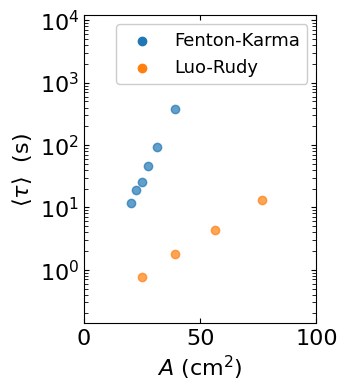

(0.0, 100.0, 0.13850549065122997, 12000.0)

In [9]:
data_folder = f"{nb_dir}/Data/full_results"
os.path.exists(data_folder)



Nbar_dir = os.path.join(data_folder,'Nbar_vs_A_full.csv')
taubar_dir = os.path.join(data_folder,'taubar_vs_A_full.csv')
df_Nbar = pd.read_csv(Nbar_dir)
df_taubar = pd.read_csv(taubar_dir)
# df_taubar
# df_Nbar



from scipy.optimize import dual_annealing
#only magnitude is to be varied
def comp_ss_err(x,*args):
    A_values,tau_values,powr,navg = args
    tau_pred_values = x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)
    se = (tau_values-tau_pred_values) ** 2
    sse = np.sum(se)
    #return sse
    #smpe = np.sum(np.log(tau_pred_values/tau_values))
    smpe = np.mean( se / tau_values**2 )
    return smpe


xfk = df_taubar[df_taubar['model_name']=='FK']['A'].values
yfk = df_taubar[df_taubar['model_name']=='FK']['taubar'].values
xlr = df_taubar[df_taubar['model_name']=='LR']['A'].values
ylr = df_taubar[df_taubar['model_name']=='LR']['taubar'].values


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
A_values = xfk
tau_values = yfk


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
# model_name='Luo-Rudy'
# A_values = xlr
# tau_values = ylr

# #simulated annealing fit 
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# tau_pred_foo = lambda x: x * (2/A_values)**(powr) * np.exp(A_values*navg*powr/2)


#fk
# mag=2.033588801144e+00 ± 0.000000000000e+00
mag=2.0335888011441683
# res_again.x=array([2.0335888])
# # magfk=1.566390007127e+00 #± 3.762187006373e-09 #1e3 epochs
# # magfk=1.566390008379e+00 #± 5.014229476075e-09 #1e4 epochs
magfk = mag

maglr=9.319636219057e-01 #± 3.981174279133e-10 #1e3 epochs
maglr=9.319636257483e-01 #± 3.444428298138e-09 #1e4 epochs
maglr = mag


# Mp = dict_fit_birth_fk['M']
# nup = dict_fit_birth_fk['m']
# Mm = dict_fit_death_fk['M']
# num = dict_fit_death_fk['m']
model_name='Fenton-Karma'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# yfk_pred = magfk * (2/xfk)**(powr) * np.exp(xfk*navg*powr/2)
# powrfk = float(powr)
# navgfk = float(navg)
# tau_pred_foofk = lambda x: float(magfk) * (2/x)**float(powrfk) * np.exp(x*float(navgfk*powrfk/2))


# Mp = dict_fit_birth_lr['M']
# nup = dict_fit_birth_lr['m']
# Mm = dict_fit_death_lr['M']
# num = dict_fit_death_lr['m']
model_name='Luo-Rudy'
# powr = num - nup
# navg = (Mp/Mm) ** (1/powr)
# ylr_pred = maglr * (2/xlr)**(powr) * np.exp(xlr*navg*powr/2)
# tau_pred_foolr = lambda x: float(maglr) * (2/x)**float(powr) * np.exp(x*float(navg*powr/2))


#plot the simulated annealing fits
figsize=(3,4)
fontsize=15
alpha=0.7
fig,ax=plt.subplots(figsize=figsize)
ax.scatter(xfk,yfk,c='C0',alpha=alpha,label='Fenton-Karma')
ax.scatter(xlr,ylr,c='C1',alpha=alpha,label='Luo-Rudy')
# # ax.scatter(xfk,yfk_pred,c='k',alpha=alpha,marker='+')#,label='Fenton-Karma')
# # ax.scatter(xlr,ylr_pred,c='k',alpha=alpha,marker='+')#,label='Luo-Rudy')
# # ax.scatter([A_fk],[tau_fk],marker='o',edgecolor='k',c='C0',#'k',
# #            alpha=1,label='Fenton-Karma')
# # ax.scatter([A_lr],[tau_lr],marker='o',edgecolor='k',c='C1',#c='k',
# #            alpha=1,label='Luo-Rudy')
# # xv=np.linspace(0,40,10)
# # ax.plot(xv,taubar0fk*np.exp(xv/A0fk),':',color='gray')#,'k--',lw=2)
# # xv=np.linspace(0,80,10)
# # ax.plot(xv,taubar0lr*np.exp(xv/A0lr),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,40,10)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foofk(xv),':',color='gray')#,'k--',lw=2)
# xv=np.linspace(10,180,10)
# ax.plot(xv,tau_pred_foolr(xv),':',color='gray')#,'k--',lw=2)

ax.set_xticks([0,50,100,150])

# format_plot(ax=ax,xlabel=r'$a$ (cm$^2/$s)',ylabel=r'$\tau$  (s)',fontsize=16)
format_plot(ax=ax,xlabel=r'$A$ (cm$^2$)',ylabel=r'$\langle\tau\rangle$  (s)',fontsize=16)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.tick_params(top=True, right=True,direction='in',which='minor',length=3)
# ax.set_ylim([1e-2,100])
# # AddLegend(ax=ax,xy=(-0.12,0.240),fontsize=fontsize-3)
leg = ax.legend(loc='upper right',fontsize=fontsize-2)#,alpha=1.)#,frameon=False,ncol=1)
# leg.set_alpha(1.)
# , edgecolor="black")
leg.get_frame().set_alpha(None)
# leg.get_frame().set_facecolor((1, 1, 1, 1))
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.set_ylim([0.31392551380514033, 4e9])
ax.set_xlim([0.,100])
ax.set_ylim([0.13850549065122997,12000])
# AddLege nd(ax=ax,xy=(0.05,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.7,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.4,0.990),fontsize=fontsize-3)
# AddLegend(ax=ax,xy=(0.1,0.25),fontsize=fontsize-3)
# ax.tick_params(axis='y', which='minor', left=True)
# plt.minorticks_on()
plt.show()
ax.axis()
#og src: http://localhost:8888/notebooks/Simulating%20the%20paired%20birth%20death%20process.ipynb


# DONE: find out which L to use for each model

In [20]:
# L_values_fk = np.around(np.sqrt(xfk),5)
# L_values_lr = np.around(np.sqrt(xlr),5)
L_values_fk = np.array([4.5  , 4.75 , 5.   , 5.25 , 5.625, 6.25 ])
L_values_lr = np.array([5.  , 6.25, 7.5 , 8.75])

# TODO: dev next run

# TODO: time permitting, eat something.

# TODO: download the results and name

# TODO: parse results

In [10]:
# TODO: plot against particle model